# Part 1


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "bp2000_ssm.txt"
bp2000 = pd.read_table(file, 
                       header = 22, 
                       delim_whitespace = True, 
                       skiprows = [899, 900, 901])
bp2000.tail()

,M/Msun,R/Rsun,T,Rho,P,L/Lsun,"X,",Y,He3,C12,N14,O16
871,0.999689,0.94773,287000.0,0.008535,3.268000e+11,1.0,0.73925,0.2437,0.0001,0.00288,0.000854,0.00792
872,0.999695,0.94814,284500.0,0.008418,3.193000e+11,1.0,0.73925,0.2437,0.0001,0.00288,0.000854,0.00792
873,0.999702,0.94855,282000.0,0.008302,3.120000e+11,1.0,0.73925,0.2437,0.0001,0.00288,0.000854,0.00792
874,0.999708,0.94896,279400.0,0.008188,3.049000e+11,1.0,0.73925,0.2437,0.0001,0.00288,0.000854,0.00792
875,0.999709,0.94904,279000.0,0.008166,3.036000e+11,1.0,0.73925,0.2437,0.0001,0.00288,0.000854,0.00792


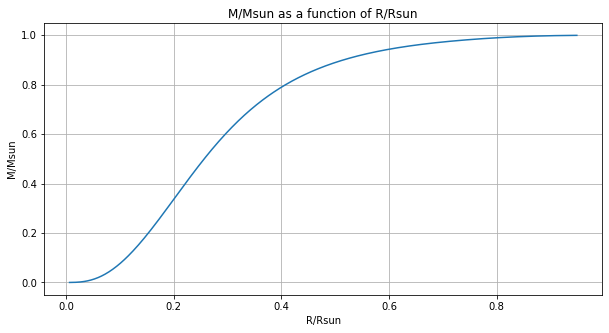

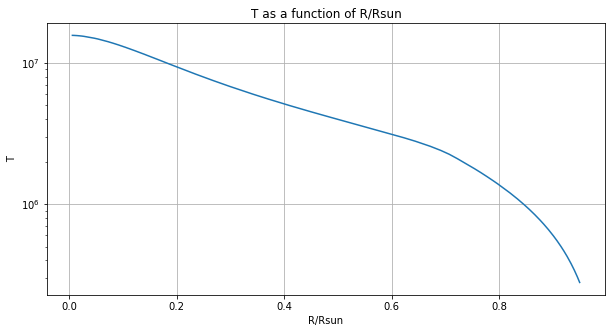

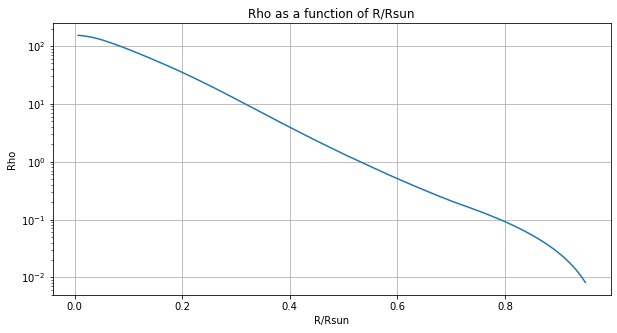

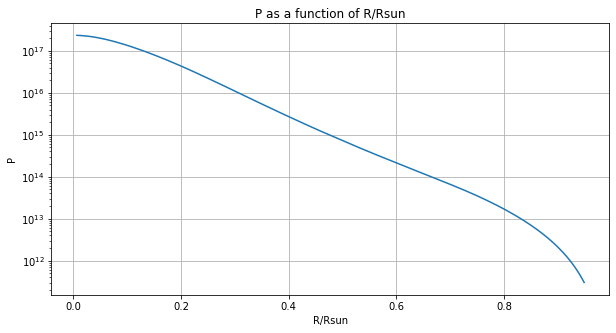

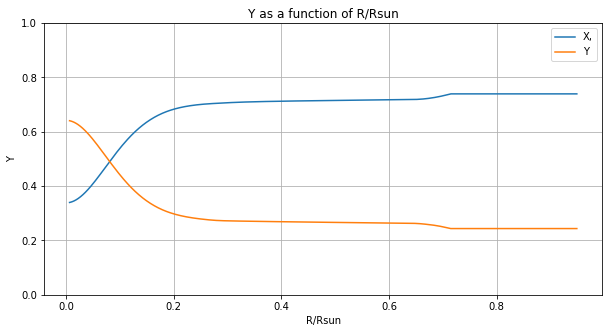

In [31]:
# Putting the columns we'd like to plot into a list: 
cols = bp2000.columns[[0, 2, 3, 4, 6, 7]]

def plot(xcol, ycol, logy = False, ax = False):
    x = bp2000[xcol]
    y = bp2000[ycol]
    if ax == True:
        ax = plt.gca()
        ax.grid()
    else:
        fig, ax = plt.subplots(1,1, figsize = (10, 5))
    ax.plot(x, y, label = f'{ycol}')
    ax.set_title(f"{ycol} as a function of {xcol}") 
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)
    ax.grid()
    if logy == True: 
        ax.semilogy()


plot('R/Rsun', 'M/Msun')
plot('R/Rsun', 'T', logy = True)
plot('R/Rsun', 'Rho', logy = True)
plot('R/Rsun', 'P', logy = True)
plot('R/Rsun', 'X,')
plot('R/Rsun', 'Y', ax = True)
ax = plt.gca()
ax.set_ylim(0, 1)
ax.legend()


# Part 2

[0.9999833333333333, -3.333333333333334e-07]
[0.9999833333333333, -3.333333333333334e-07]
[0.9999833333333333, -3.333333333333334e-07]


<ipython-input-5-d493c6621b45>:49: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xi2, np.sin(xi2)/xi2, label='n = 1')


Text(0.5, 1.0, 'Solutions to the Lane Emden Equation')

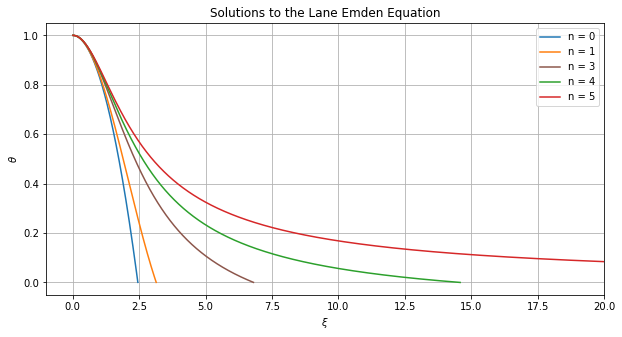

In [5]:
def solveLaneEmden(log_delta_xi=-4, n=3):
    delta_xi = 10**log_delta_xi
    
    # Inner boundary condition 
    y0 = 1 - delta_xi**2/6 
    z0 = -delta_xi**3/3 
    
    print([y0, z0])
    
    ys  = [y0]
    zs  = [z0]
    xis = [delta_xi]
    ycs = [y0]
    zcs = [z0]
    while True:
        y  =  ys[len(ys)  - 1]
        z  =  zs[len(zs)  - 1]
        xi = xis[len(xis) - 1]
        yc = ycs[len(ycs) - 1]
        zc = zcs[len(zcs) - 1]
        
        ## Primitive method 
        yi = y + delta_xi * z/xi**2
        zi = z + delta_xi * -xi**2*y**n
        
        ## Predictor-corrector technique 
        xii = xi + delta_xi
        yci = yc + 1/2 * delta_xi * (z/xi**2 + zi/xii**2)
        zci = zc + 1/2 * delta_xi * (-xi**2*y**n - xi**2*yi**n)
        
        # Outer boundary condition 
        if (yi < 1e-10 or yci < 1e-10): break
        
        xis += [xii]
        ys  += [yi]
        zs  += [zi]
        ycs += [yci]
        zcs += [zci]
    
    return (xis, ys, ycs)

def plotLaneEmden(log_delta_xi=-2, n=3):
    xis, ys, ycs = solveLaneEmden(log_delta_xi, n)
    
    xi2 = np.arange(0, np.sqrt(6), 1e-3)
    plt.plot(xi2, 1-xi2**2/6, label='n = 0')
    
    xi2 = np.arange(0, np.pi, 1e-3)
    plt.plot(xi2, np.sin(xi2)/xi2, label='n = 1')
    
#     plt.plot(xis, ys,  'g',   label='n = '+str(n))
    plt.plot(xis, ycs, 'tab:brown', label='n = 3')
    
    plt.legend(loc='best')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\theta$')
    plt.grid()

# Solve the lane emden equation for n from 0 to 5 ignoring the ys output as suggested
xis_n4, _, n4 = solveLaneEmden(log_delta_xi = -2, n = 4)
xis_n5, _, n5 = solveLaneEmden(log_delta_xi = -2, n = 5)

fig, ax = plt.subplots(1,1, figsize = (10, 5))
plotLaneEmden(-2, 3)

ax.plot(xis_n4, n4, label = "n = 4")
ax.plot(xis_n5, n5, label = "n = 5")
ax.set_xlim(-1, 20 ) # Set limits so that everything appears visible
ax.legend()
ax.set_title('Solutions to the Lane Emden Equation')

The variable $\theta$ is defined as a dimensionless function that express the density versus radius in terms of a scaling factor: 
$$
[\theta_n(r)]^n = \frac{\rho(r)}{\rho_c}
$$
where n is the specific polytropic index. The scaling factor $\rho_c$ is the central density of the polytropic stellar model. The variable $\xi$ which is the independent variable is given by
$$
\xi = \frac{r}{\alpha}
$$
where $\alpha$ is given by the quantity 
$$
\alpha^2 = \frac{(n+1)P_c}{4\pi G \rho_c^2}
$$
making $\xi$ dimensionless. The variable $\xi$ can be thought of as a proxy for the radius as the two are related by a constant. Since $\theta$ relates the density as a function of the radius to the central density, the function $\theta(r)$ obeys the boundary conditions $\theta (0) = 1$ and $\theta(1) = 0$. 

For increasing n, the model for the density as function of the radius changes. For n = 0, the polytropic model assumes a constant density. THe density is obtained by using the corresponding function $\theta(\xi)$ for a given polytropic index. The above graph shows that for higher values of n, the model predicts higher density gradients. 

*The code that is used to solve and plot the Lane-Emden equation was created by [Earl Bellinger at the Stellar Astrophysics Centre in Denmark](https://github.com/earlbellinger/Lane-Emden/blob/master/Lane-Emden.ipynb)*

# Part 3

[0.9999833333333333, -3.333333333333334e-07]
[0.9999833333333333, -3.333333333333334e-07]
[0.9999833333333333, -3.333333333333334e-07]
[0.9999833333333333, -3.333333333333334e-07]
[0.9999833333333333, -3.333333333333334e-07]


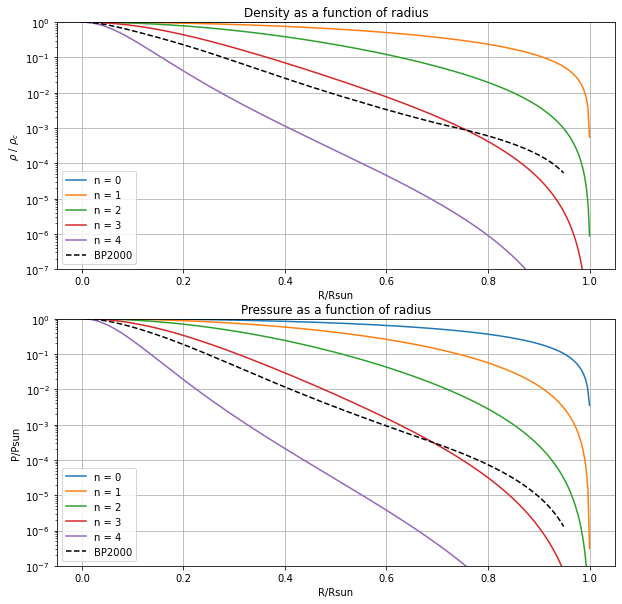

In [6]:
# calculate rho and p from the solution to the lane emden equation
fig, [ax1, ax2] = plt.subplots(2,1, figsize = (10, 10))
def rho(n, theta):
    # rho = rhp_c * theta^n -> theta = (rho / rho_c)^1/n
    return theta ** n

def P(n, theta):
    # P = P_c * theta^(n+1)
    return theta ** (n + 1)

# rescale the radius: 
def radius(xi, theta):
    idx = np.argmin(np.abs(theta))
    R = xi[idx]
    return [k / R for k in xi[:idx + 1]]

n = np.arange(0, 5)
for n in n:
    xis, _, ycs = solveLaneEmden(-2, n)
    r_R = radius(xis, ycs)
    rho_rhoc = rho(n, ycs)
    P_Pc = P(n, ycs)
    
    ax1.plot(r_R, rho_rhoc, label = f'n = {n}')
    ax2.plot(r_R, P_Pc, label = f'n = {n}')
    
rho_frac = bp2000['Rho']/bp2000['Rho'][0]
P_frac = bp2000['P']/bp2000['P'][0]

# No plot them as a function of radius
ax1.plot(bp2000['R/Rsun'], rho_frac, 'k--', label = 'BP2000')
ax1.set_title("Density as a function of radius")
ax1.set_xlabel('R/Rsun')
ax1.set_ylabel(r'$\rho$ / $\rho_c$') # I've never had to put this r'' in before why now?
ax1.grid()
ax1.semilogy()
ax1.set_ylim(1e-7, 1e0)
ax1.legend()

ax2.plot(bp2000['R/Rsun'], P_frac, 'k--', label = "BP2000")
ax2.set_title("Pressure as a function of radius")
ax2.set_xlabel("R/Rsun")
ax2.set_ylabel("P/Psun")
ax2.grid()
ax2.semilogy()
ax2.set_ylim(1e-7, 1e0)
ax2.legend()

From the above plot, we see that the solution to the Lane-Emden equation for n = 3 is the closest integer value solution to the BP2000 numerical model for the sun. The reason that the n = 0 doesn't appear on the first graph is becasue the density profile is constant for the n = 0 stellar model. So the correponding curve lies along the $\rho / \rho_c  = 1$ line. 